In [155]:
# !pip install pmdarima

In [282]:
# 윈도우일 경우
plt.rc("font", family = "Malgun Gothic")
mpl.rc('font',family='Malgun Gothic')
# 맥일 경우
# plt.rc("font", family = "AppleGothic")

# 참조블로그
# https://tjansry354.tistory.com/14
# https://unfinishedgod.netlify.app/2021/04/19/python-%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8-%EC%A3%BC%EA%B0%80-%EC%98%88%EC%B8%A1-study/
# https://hwao-story.tistory.com/13

In [283]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl

plt.style.use('seaborn-whitegrid')

import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import seaborn as SNS
%matplotlib inline

import itertools

In [284]:
# 목적 : 선정한 52개 코인의 가격을 과거데이터를 토대로 ARIMA모델에 학습시켜 3년뒤의 가격을 예측하는것(시각화)

In [285]:
data = pd.read_csv('데이터2/archive/coin_bitcoin.csv')

In [286]:
date = data["Date"].to_list()
for i in range(len(date)):
    date[i] = date[i][0:10]
data["Date"] = date
data

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [287]:
data = data.rename(columns={'Close': 'Price'})
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data

,SNo,Name,Symbol,High,Low,Open,Price,Volume,Marketcap
Date,,,,,,,,,
2013-04-29,1,Bitcoin,BTC,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
2013-04-30,2,Bitcoin,BTC,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2013-05-01,3,Bitcoin,BTC,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
2013-05-02,4,Bitcoin,BTC,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
2013-05-03,5,Bitcoin,BTC,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...
2021-07-02,2987,Bitcoin,BTC,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2021-07-03,2988,Bitcoin,BTC,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2021-07-04,2989,Bitcoin,BTC,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11


In [289]:
data = data[["Price"]]
data.info()
data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2991 entries, 2013-04-29 to 2021-07-06
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2991 non-null   float64
dtypes: float64(1)
memory usage: 46.7 KB


,Price
Date,
2013-04-29,144.539993
2013-04-30,139.000000
2013-05-01,116.989998
2013-05-02,105.209999
2013-05-03,97.750000
...,...
2021-07-02,33897.048590
2021-07-03,34668.548402
2021-07-04,35287.779766


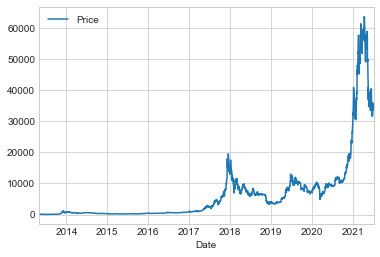

In [290]:
# 2013년 4월 29일 ~ 2021년 7월 6일 일별코인 가격 시각화
data.plot()
plt.show()

In [292]:
# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습
# order 파라미터 p, d, q는 일반적인 가이드라인이 존재한다. 보통은 p와 q의 합이 2 미만인 경우, 
# 혹은 p와 q의 곱이 0을 포함한 짝수인 경우가 좋은 파라미터의 조합이라고 알려져 있다.

#  AR(Autoregression) 모델로 자기 자신의 과거를 정보로 사용하는 개념이다. 
# 이는 ’현재의 상태는 이전의 상태를 참고해서 계산된다’라는 아이디어를 기본 전제로 한다.

# 차분이란 현재 상태의 변수에서 바로 전 상태의 변수를 빼주는 것을 의미하며, 시계열 데이터의 불규칙성을 조금이나마 보정해주는 역할
# 을 한다. 또한 앞서 말한 ARIMA 모델의 경향성을 의미한다.

# MA(Moving Average)모델로 ’이번 항에서의 오차를 이용하여 현재 항의 상태를 추론하자’라는 방법이다.

# ARIMA 클래스에 order=(2,1,2)라고 입력되어진 파라미터는 AR이 몇번째 과거까지를 바라보는지에 대한 파라미터 
# 치분(Defference)에 대한 파라미터, MA가 몇 번째 과거까지를 바라보는지에 대한 파라미터를 의미한다.

model = ARIMA(data, order=(2,1,2))

# trend : constant를 가지고 있는지, c - constant / nc - no constant
# disp : 수렴 정보를 나타냄
#  p-value( P>|z| )가 0.05이하이면 유의미한 것으로 나타난다. 

model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

C:\Users\buggi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\buggi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                 2990
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -23292.265
Method:                       css-mle   S.D. of innovations            584.708
Date:                Mon, 23 Aug 2021   AIC                          46596.530
Time:                        01:09:00   BIC                          46632.548
Sample:                    04-30-2013   HQIC                         46609.487
                         - 07-06-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.4009     11.558      0.986      0.324     -11.253      34.055
ar.L1.D.Price     0.4951      0.183      2.702      0.007       0.136       0.854
ar.L2.D.Price     0.0545      0.186     

C:\Users\buggi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


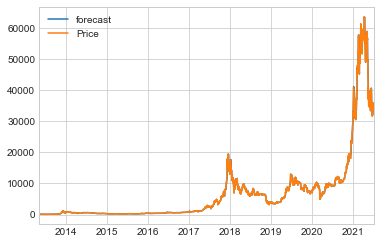

In [293]:
# 모델이 학습후 예측한 값과 실제값이 같은것이 보여지고 있음(제공된 데이터로 학습완료)
fig = model_fit.plot_predict()

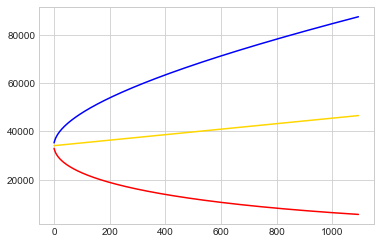

In [294]:
# 2013-04-29 ~ 2021-07-06
forecast_data = model_fit.forecast(steps=1095) # 학습 데이터셋으로부터 steps일 뒤를 예측

# 테스트 데이터셋을 설정
test_df = data.reset_index().tail(1095)#steps

pred_price = forecast_data[0].tolist() # 마지막 steps일의 예측 데이터
test_price = test_df.Price.values # 실제 steps일 가격 데이터 
pred_price_lower = [] # 마지막 steps일의 예측 데이터의 최소값
pred_price_upper = [] # 마지막 steps일의 예측 데이터의 최대값

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_price_lower.append(lower)
    pred_price_upper.append(upper)
    
plt.plot(pred_price_upper, color="blue") # 모델이 예상한 최대가격 그래프
plt.plot(pred_price, color="gold") # 모델이 예상한 가격 그래프
plt.plot(pred_price_lower, color="red") # 모델이 예상한 최소가격 그래프  

# plt.plot(test_price, color="green") # 실제 가격 그래프